# Project Description - Parallelized Tools for Point Pattern Analysis
----------------
**Hu Shao**


## General Scope
The main purpose of this project is to develop some parallelized algorithm/tools to leverage the performance of existing point pattern analysis methods in [Pysal](https://github.com/pysal).  
Simulating spatial processes in general is computation intensive. For example, in [Distance Based Statistical Method for Planar Point Patterns](https://github.com/sjsrey/pysal/blob/points_contrib/pysal/contrib/points/distance_statistics.py), we need to simulate CSR or a specific spatial process for a lot of times to build simulation envelops for the hypothesis testing. Parallelizing this process is important and logically straightforward.  
##  Tentative workplan
1. Get familiar with parallel computing algorithm of Python and the point pattern analysis algorithms in Pysal.
2. Develop the parallelized algorithms for Pysal.

## Deliverables
This work will contribute to the [point pattern module](https://github.com/sjsrey/pysal/tree/points_contrib/pysal/contrib/points) of Pysal

## Working Process
------------
The step by step working process will be recorded in this section

### Step 1:
<b style="color:blue">Figure out the computing process for a specific point pattern analysis and decide which parts of them could be parallelized</b>  
Directly related pages for reading:
- pointpattern.ipynb  
    - This page briefly introduces the basic knowledge about point pattern and the implementation of "Point pattern analysis" in PySAL's "pointpattern" module. It also talks about how a point lists can be loaded into this module.  
- distance_statistics.ipynb
    - G function: just calculate the nearest neighbor distance of each event. Say, if there are 12 events, then there will be 12 distances.
    - F function: randomly generate extra points and calculate the distance of nearest event to each of the points. So, the distances' number equals to the number of generated points. If the number of generated points is large (e.g. 100), then the result statistic line will be smoother than the G function.

### Step2:
<b style="color:blue">Get familiar the exactly calculation process form importing point to generating the simulation envelop</b>  
**Importing points into PointPattern Class**  
``
def __init__(self, points, window=None, names=None, coord_names=None):
``
Two parameters are important in the init function:
1. points: all the sample points
2. window: study area/constrain.  
    The window parameter takes instance of the class *pysal.contrib.points.Window*, which is an sub-class of *pysal.cg.shapes.Polygon*  
    The inherit function **contains_point** is used to determine whether a randomly generated point locates in the polygon. Finally the "real" contains_point function is implemented in the class *Ring*. Typical method is used: firstly check if the points located in the BBX of polygon; If yes, compare this point to every line segment of the boundary.

In [28]:
# Import essential libraries for following calculation
import sys
path_base_dell = 'C:/work/ASUWork/pysal'
path_base_os = '/Users/hushao/Documents/ASUWork/pysal/'
sys.path.append(path_base_dell)
sys.path.append(path_base_os)
import pysal as ps
import numpy as np
from pysal.contrib.points.pointpattern import PointPattern
from pysal.contrib.points.process import PoissonPointProcess 
from pysal.contrib.points.distance_statistics import G, F, J, K, L
from pysal.contrib.points.distance_statistics import Genv, Fenv, Jenv, Kenv, Lenv
%matplotlib inline
import matplotlib.pyplot as plt

from pysal.cg.shapes import Polygon, Point
import time
print("import finished!")

import finished!


In [37]:
time_begin = int(round(time.time() * 1000))
pols = ps.open("data/Tunxi_region.shp")
for polygon in pols:
    print(polygon)
polygon = pols[0]
time_end = int(round(time.time() * 1000))
print(time_begin, time_end, time_end - time_begin)

(1461196634260L, 1461196634262L, 2L)


In [12]:
len(polygon.vertices)
polygon.contains_point((1,3))

False

In [30]:
time.time()

1461196569.788

(12, 2)
        x      y
0   66.22  32.54
1   22.52  22.39
2   31.01  81.21
3    9.47  31.02
4   30.78  60.10
5   75.21  58.93
6   79.26   7.68
7    8.23  39.93
8   98.73  77.17
9   89.78  42.53
10  65.19  92.08
11  54.46   8.48


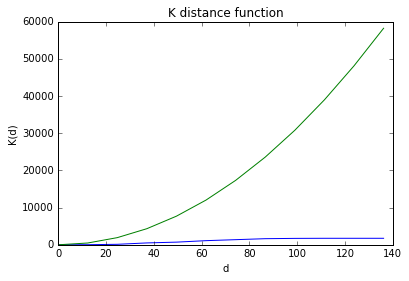

In [15]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
pp = PointPattern(points) # import the points into the class PointPattern
kf = K(pp) # Calculate the K function for the points
kf.plot()

(12, 2)
            x          y
0   52.373735  83.972663
1   28.579555  21.990809
2   24.124829  19.389827
3   62.426080  83.804722
4   24.264666  79.266325
5   87.931431  55.073828
6   76.449847  79.343137
7   11.637317  84.528198
8   37.977332  86.195984
9   56.068287  35.103881
10  97.715969  69.345308
11  17.721552  29.068473
(12, 2)
            x          y
0   17.497055  52.276476
1   16.037924  62.425478
2   46.895848   9.052437
3   21.170950  14.490519
4    9.534096  50.756530
5   25.158535  37.088338
6   43.225081  18.459511
7   33.568137  86.940810
8   20.532576  10.142543
9   29.775413  14.432447
10  67.442220  27.242546
11  15.700306  47.404129
(12, 2)
            x          y
0   18.182165  39.304614
1   89.225395  11.017624
2   11.517087  89.731632
3   78.910424  45.738189
4   41.556488  76.122819
5   26.363070   9.316150
6   22.913172  29.071526
7   49.715467  36.879058
8   61.800945  47.316305
9   36.512689  53.845029
10  75.308078  61.135145
11  75.040298  78.287134
(

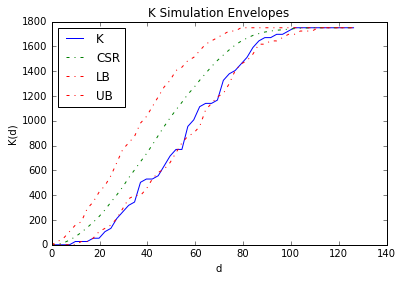

In [19]:
realizations = PoissonPointProcess(pp.window, pp.n, 100, asPP=True) # simulate CSR 100 times
kenv = Kenv(pp, intervals=20, realizations=realizations)
kenv.plot()